In [2]:
%run basicOp.py
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
import matplotlib
from scipy.ndimage.filters import gaussian_filter1d
from pylab import rcParams

#%matplotlib widget, camera ready submission problem
matplotlib.rc('pdf', fonttype=42)
matplotlib.rcParams['savefig.dpi'] = 300
rcParams.update({'figure.autolayout': True})

In [3]:
df_BER = pd.DataFrame(columns=["Free running - baseline", "Free running - people walks around", "Injection locked - baseline", "Injection locked - people walks around"], index=["Round_1", "Round_2", "Round_3"])

In [4]:
df_BER.iloc[:, 0] = [round(i, 6) for i in [0.028257650542941756, 0.030357318957299234, 0.02837312113174182]]
df_BER.iloc[:, 1] = [round(i, 6) for i in [0.2792907523510972, NaN, NaN]]
df_BER.iloc[:, 2] = [round(i, 6) for i in [0.00020258620689655172, 6.944444444444445e-06, 6.944444444444445e-06]]
df_BER.iloc[:, 3] = [round(i, 6) for i in [0.0002413793103448276, 9.051724137931034e-05, 0.0009008620689655172]]

In [5]:
df_BER

,Free running - baseline,Free running - people walks around,Injection locked - baseline,Injection locked - people walks around
Round_1,0.028258,0.279291,0.000203,0.000241
Round_2,0.030357,NaN,0.000007,0.000091
Round_3,0.028373,NaN,0.000007,0.000901


In [6]:
df_BER.mean()

Free running - baseline                   0.028996
Free running - people walks around        0.279291
Injection locked - baseline               0.000072
Injection locked - people walks around    0.000411
dtype: float64

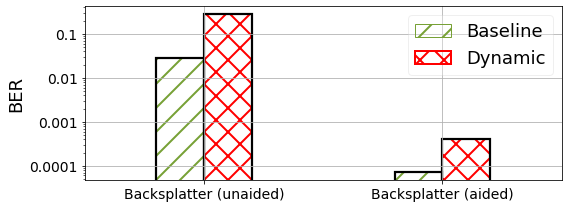

In [9]:
# Example grouped bar chart
from pylab import rcParams
import matplotlib as mpl

rcParams['figure.figsize'] = 8, 3
fig, ax1 = plt.subplots(1)
# change hatch parameters
mpl.rc('hatch', linewidth=2)

labels = ["Backsplatter (unaided)", "Backsplatter (aided)"]
x = np.arange(len(labels))  # the label locations

width = 0.2

ax1.bar(x-width/2, df_BER.iloc[:, [0,2]].mean(), color='none', edgecolor='#77A136', width=width, hatch="/", label="Baseline", zorder=0)
ax1.bar(x+width/2, df_BER.iloc[:,[1,3]].mean(), color='none', edgecolor='red', width=width, hatch="x", label="Dynamic", linewidth=2, zorder=0)

ax1.bar(x-width/2, df_BER.iloc[:, [0,2]].mean(), color='none', edgecolor='black', width=width, linewidth=2.2, zorder=1)
ax1.bar(x+width/2, df_BER.iloc[:,[1,3]].mean(), color='none', edgecolor='black', width=width, linewidth=2.2, zorder=1)

ax1.set_yscale('log')
tmp = [-6, -5, -4, -3, -2, -1, 0]
tmp = ['{:f}'.format(10**i).rstrip('0').rstrip('.') for i in tmp]
ax1.set_yticklabels(tmp)

ax1.grid()
# ax1.set_xlabel('Carrier emitter signal strength [dBm]', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.set_ylabel("BER", fontsize=18)
ax1.tick_params(labelsize=14)
ax1.set_xlim([-0.5, 1.5])

ax1.legend(fontsize=18, framealpha=0.3)
plt.savefig('./reliability.pdf')